# Assignment: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [2]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r01/access/csv/ibtracs.ALL.list.v04r01.csv'	

df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

In [16]:
df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715364,2024297N17089,2024,76,NI,BB,DANA,2024-10-23 12:00:00,NR,17.3,89.0,NaN,NaN
715365,2024297N17089,2024,76,NI,BB,DANA,2024-10-23 15:00:00,NR,17.7,88.8,NaN,NaN
715366,2024297N17089,2024,76,NI,BB,DANA,2024-10-23 18:00:00,NR,18.1,88.7,NaN,NaN
715367,2024297N17089,2024,76,NI,BB,DANA,2024-10-23 21:00:00,NR,18.5,88.6,NaN,NaN


How many rows does this dataset have?

In [17]:
# this dataset has 715,326 rows

How many North Atlantic hurricanes are in this dataset?

In [18]:
print(df['BASIN'].value_counts()['NA'])

# There are 126,395 North Atlantic hurricanes in this dataset

126399


In [19]:
basin_df = df['BASIN'].value_counts().to_frame().reset_index().rename(columns={'index':'BASIN', 'values':'count'})
basin_df.head()

# another way to check occurrences of all BASIN values

,BASIN,count
0,WP,239030
1,SI,160757
2,NA,126399
3,SP,67762
4,EP,64182


### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [20]:
df.BASIN.unique()

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [21]:
df.SUBBASIN.unique()

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [22]:
df.NATURE.unique()

array(['NR', 'TS', 'ET', 'MX', 'SS', 'DS'], dtype=object)

### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [23]:
df = df.rename(columns = {'WMO_WIND': 'WIND', 'WMO_PRES' : 'PRES'})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN


### 3) Get the 10 largest rows in the dataset by `WIND`

In [24]:
df.nlargest(n = 10, columns = "WIND")

# just another way to do this... 
# df.WIND.nlargest(10)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
659500,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
659498,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
659502,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
421314,1980214N11330,1980,55,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
175297,1935241N23291,1935,45,NA,NA,UNNAMED,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
175298,1935241N23291,1935,45,NA,NA,UNNAMED,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
175300,1935241N23291,1935,45,NA,GM,UNNAMED,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
475876,1988253N12306,1988,73,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
545771,1997253N12255,1997,75,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
599105,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [25]:
gb = df.groupby('SID')
gb.max().nlargest(10, 'WIND')

,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
SID,,,,,,,,,,,
2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-24 12:00:00,TS,23.2,-94.0,185.0,1007.0
1980214N11330,1980,55,NA,NA,ALLEN,1980-08-11 18:00:00,TS,28.9,-30.0,165.0,1010.0
1935241N23291,1935,45,NA,NA,UNNAMED,1935-09-10 12:00:00,TS,57.0,-31.1,160.0,996.0
1988253N12306,1988,73,NA,NA,GILBERT,1988-09-20 00:00:00,TS,43.4,-54.0,160.0,1008.0
1997253N12255,1997,75,EP,MM,LINDA,1997-09-17 18:00:00,TS,23.5,-104.7,160.0,1007.0
2005289N18282,2005,97,NA,NA,WILMA,2005-10-26 18:00:00,TS,45.5,-52.0,160.0,1004.0
2019236N10314,2019,53,NA,NA,DORIAN,2019-09-09 00:00:00,TS,51.6,-46.4,160.0,1011.0
1998295N12284,1998,88,NA,NA,MITCH,1998-11-09 18:00:00,TS,63.5,-5.0,155.0,1005.0
2005261N21290,2005,80,NA,NA,RITA,2005-09-26 06:00:00,TS,39.5,-69.9,155.0,1009.0


In [26]:
#leftover code!

# gb = df.groupby('SID')
# gb.WIND.max().nlargest(10)

# I then proceeded to go a little overboard so that I could get the full rows from the original dataframe...

# creates list "a" with max WIND values
# gb = df.groupby('SID')
# a = gb.WIND.max().nlargest(10)

# creates list "big_10" with SID values
# gb = df.groupby('SID')
# big_10 = gb.WIND.max().nlargest(10).index.tolist()

# creates list "big_10_index" of index values from each SID in list "big_10" that matchs max WIND value...
# big_10_index = []

# for i in range(len(big_10)):
#     big_10_index.append(df[(df['SID'] == big_10[i]) & (df['WIND'] == a[i])].index[0])

# df.iloc[big_10_index]

### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

In [27]:
gb1 = df.groupby('SID')
big_20 = gb1.max().nlargest(20, 'WIND')
big_20

,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
SID,,,,,,,,,,,
2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-24 12:00:00,TS,23.2,-94.0,185.0,1007.0
1980214N11330,1980,55,NA,NA,ALLEN,1980-08-11 18:00:00,TS,28.9,-30.0,165.0,1010.0
1935241N23291,1935,45,NA,NA,UNNAMED,1935-09-10 12:00:00,TS,57.0,-31.1,160.0,996.0
1988253N12306,1988,73,NA,NA,GILBERT,1988-09-20 00:00:00,TS,43.4,-54.0,160.0,1008.0
1997253N12255,1997,75,EP,MM,LINDA,1997-09-17 18:00:00,TS,23.5,-104.7,160.0,1007.0
2005289N18282,2005,97,NA,NA,WILMA,2005-10-26 18:00:00,TS,45.5,-52.0,160.0,1004.0
2019236N10314,2019,53,NA,NA,DORIAN,2019-09-09 00:00:00,TS,51.6,-46.4,160.0,1011.0
1998295N12284,1998,88,NA,NA,MITCH,1998-11-09 18:00:00,TS,63.5,-5.0,155.0,1005.0
2005261N21290,2005,80,NA,NA,RITA,2005-09-26 06:00:00,TS,39.5,-69.9,155.0,1009.0


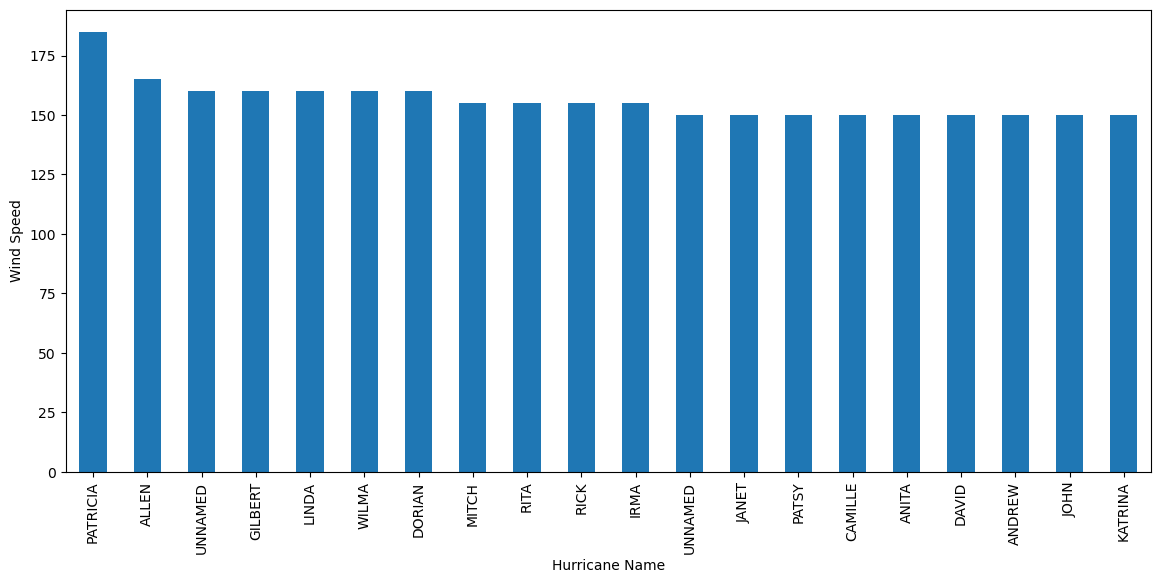

In [28]:
fig, axes = plt.subplots(figsize = (14, 6))
ax0 = axes

big_20.plot.bar(ax = ax0, x = 'NAME', y = 'WIND', legend = False)
ax0.set_xlabel('Hurricane Name')
ax0.set_ylabel('Wind Speed');

### 6) Plot the count of all datapoints by Basin

as a bar chart

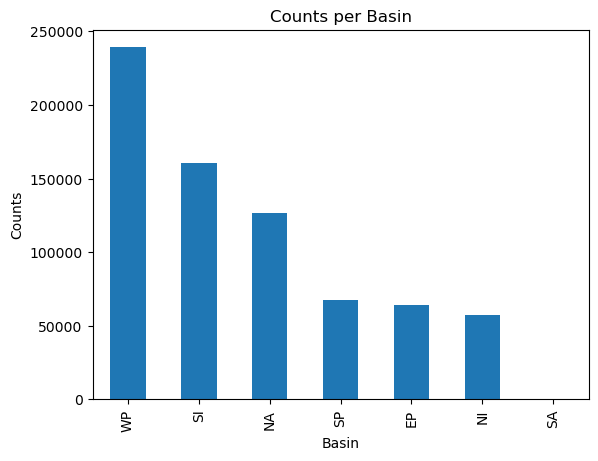

In [29]:
basin_df = df['BASIN'].value_counts().to_frame().reset_index().rename(columns={'index':'BASIN', 'values':'count'})
# print(basin_df);

basin_df.plot.bar(x = 'BASIN', y = 'count', legend = False)
plt.xlabel('Basin')
plt.ylabel('Counts')
plt.title('Counts per Basin')
plt.show()

### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

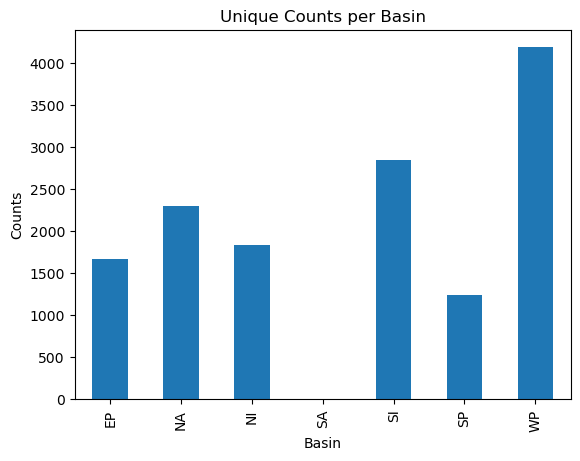

In [30]:
basin_names = df.groupby('BASIN')['SID'].nunique()

basin_names.plot.bar()
plt.xlabel('Basin')
plt.ylabel('Counts')
plt.title('Unique Counts per Basin')
plt.show()

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

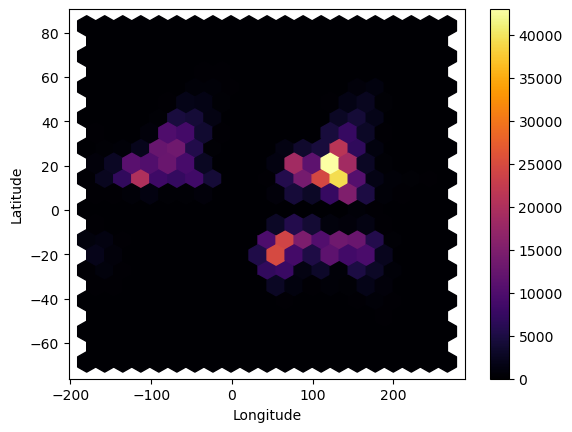

In [31]:
plt.hexbin(df['LON'], df['LAT'], gridsize = 20, cmap = 'inferno')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [32]:
katrina = (df[(df['NAME']  == 'KATRINA') & (df['SEASON'] == 2005)].index.tolist())

# Katrina's index range is 597104 - 597167
# Katrina's SID is 2005236N23285

Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

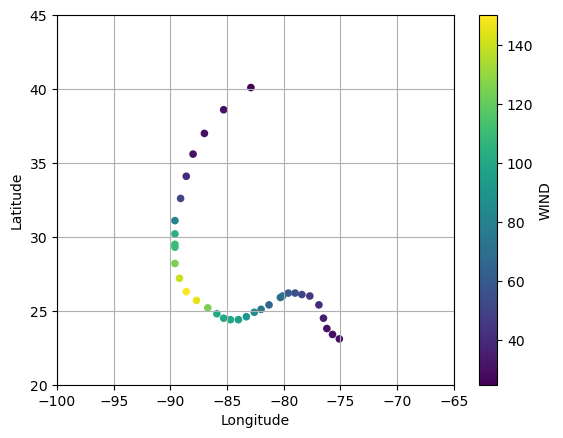

In [33]:
gb2 = df.groupby('SID')
group_data = gb2.get_group('2005236N23285')

group_data.plot.scatter(x= 'LON', y = 'LAT', c = 'WIND', grid = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-100, -65)
plt.ylim(20, 45)
plt.show()

# Included another scatterplot below with cartopy coastlines!

In [34]:
from cartopy import crs as ccrs, feature as cfeature

projPC = ccrs.PlateCarree()
lonW = -100
lonE = -65
latS = 20
latN = 45
# lonW = -180
# lonE = 180
# latS = -80
# latN = 80
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'

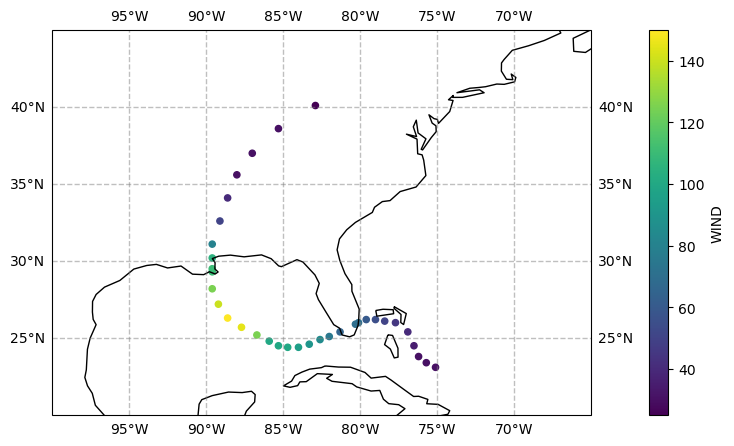

In [35]:
fig, axes = plt.subplots(figsize = (15, 5), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax0 = axes

splot0 = group_data.plot.scatter(ax = ax0, x= 'LON', y = 'LAT', c = 'WIND', grid = True)
gl = ax0.gridlines(draw_labels = True, linewidth = 1, color = 'gray', alpha = 0.5, linestyle = '--')
ax0.set_extent([lonW, lonE, latS, latN], crs = projPC)
ax0.coastlines(resolution = res, color = 'black');

### 10) Make time the index on your dataframe

In [36]:
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN


In [37]:
df.set_index('ISO_TIME', inplace = True)
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,UNNAMED,NR,10.9,80.3,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,UNNAMED,NR,10.9,79.8,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,UNNAMED,NR,10.8,79.4,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,UNNAMED,NR,10.8,78.9,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,UNNAMED,NR,10.8,78.4,NaN,NaN


### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

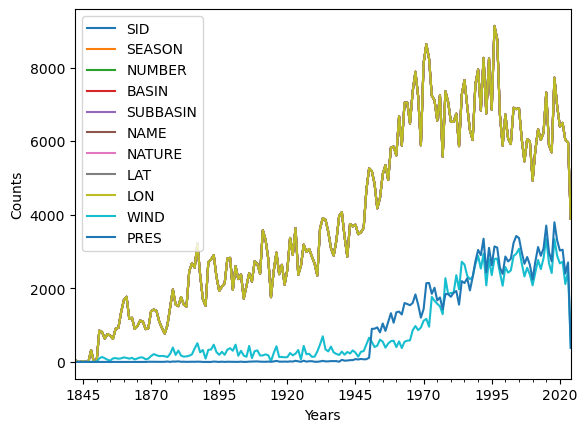

In [38]:
yearly_data = df.resample('YE').count()
yearly_data

yearly_data.plot.line()
plt.xlabel('Years')
plt.ylabel('Counts');

### 12) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

In [39]:
gb3 = df.groupby('BASIN')
NA_data = gb3.get_group('NA')

NA_2005 = NA_data[NA_data['SEASON'] == 2005]
NA_2005

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
2005-06-08 18:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,16.9,-84.0,25.0,1004.0
2005-06-08 21:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.1,-83.9,NaN,NaN
2005-06-09 00:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.4,-83.9,30.0,1003.0
2005-06-09 03:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.8,-83.9,NaN,NaN
2005-06-09 06:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,18.2,-83.9,35.0,1003.0
...,...,...,...,...,...,...,...,...,...,...,...
2006-01-07 06:00:00,2005364N24324,2005,115,NA,NA,ZETA,DS,24.2,-52.7,25.0,1012.0
2006-01-07 09:00:00,2005364N24324,2005,115,NA,NA,ZETA,DS,24.4,-53.4,NaN,NaN
2006-01-07 12:00:00,2005364N24324,2005,115,NA,NA,ZETA,DS,24.8,-54.2,25.0,1014.0


(1807, 11)

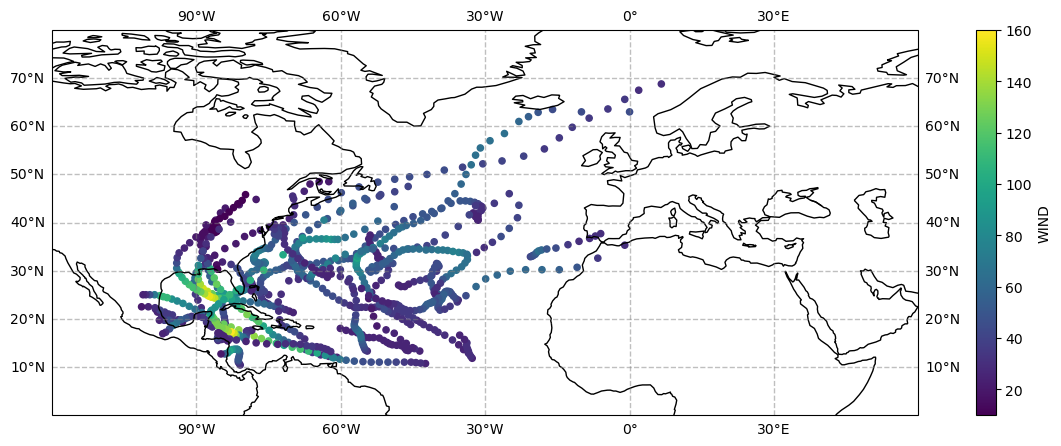

In [44]:
projPC = ccrs.PlateCarree()
lonW = -120
lonE = 60
latS = 0
latN = 80
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'

fig, axes = plt.subplots(figsize = (15, 5), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax0 = axes

splot1 = NA_2005.plot.scatter(ax = ax0, x= 'LON', y = 'LAT', c = 'WIND', grid = True)
# splot1 = NA_2005.plot.line(ax = ax0, x= 'LON', y = 'LAT', grid = True, legend = False)
gl = ax0.gridlines(draw_labels = True, linewidth = 1, color = 'gray', alpha = 0.5, linestyle = '--')
ax0.set_extent([lonW, lonE, latS, latN], crs = projPC)
ax0.coastlines(resolution = res, color = 'black');

### 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

In [32]:
NA_since_1970 = NA_data[NA_data.index.year > 1969]
NA_since_1970

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,35,NA,CS,ALMA,TS,11.5,-79.0,25.0,NaN
1970-05-17 21:00:00,1970138N12281,1970,35,NA,CS,ALMA,TS,11.6,-79.1,NaN,NaN
1970-05-18 00:00:00,1970138N12281,1970,35,NA,CS,ALMA,TS,11.8,-79.3,25.0,NaN
1970-05-18 03:00:00,1970138N12281,1970,35,NA,CS,ALMA,TS,12.0,-79.5,NaN,NaN
1970-05-18 06:00:00,1970138N12281,1970,35,NA,CS,ALMA,TS,12.1,-79.7,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-20 03:00:00,2024291N14279,2024,74,NA,NA,KRISTY:NADINE,TS,17.1,-90.6,NaN,NaN
2024-10-20 06:00:00,2024291N14279,2024,74,NA,NA,KRISTY:NADINE,TS,17.0,-91.2,NaN,NaN
2024-10-20 09:00:00,2024291N14279,2024,74,NA,NA,KRISTY:NADINE,TS,16.9,-91.9,NaN,NaN


### 14) Plot the number of datapoints per day from this filtered dataframe

Make sure you figure is big enough to actually see the plot

In [ ]:
daily_counts = NA_since_1970.resample('D')['SID'].count()

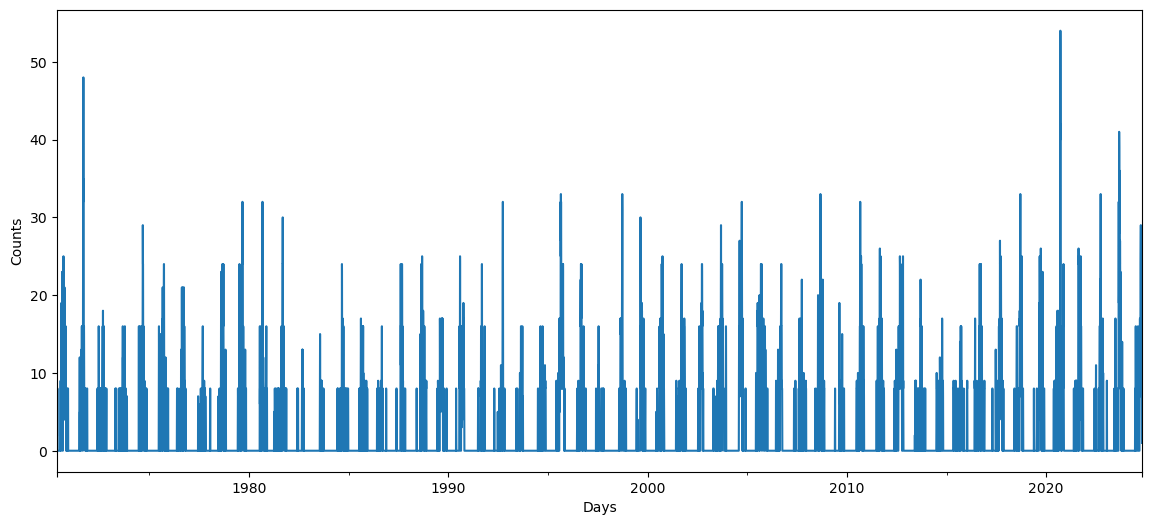

In [42]:
fig, axes = plt.subplots(figsize = (14, 6))
ax0 = axes

daily_counts.plot.line(ax = ax0, legend = False)

# xticks = ax0.get_xticks()
# ax0.set_xticks(xticks[::20])
# xticklabels = ax0.get_xticklabels()
# ax0.set_xticklabels(xticklabels[::20])

ax0.set_xlabel('Days')
ax0.set_ylabel('Counts')
ax0.set_title('')
plt.show()

### 15) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

In [48]:
dayofyear_climatology_mean = NA_since_1970.groupby(NA_since_1970.index.dayofyear).mean(numeric_only = True) 
dayofyear_climatology_mean.drop(['SEASON', 'NUMBER', 'LAT','LON'], axis = 1, inplace = True)

dayofyear_climatology_std = NA_since_1970.groupby(NA_since_1970.index.dayofyear).std(numeric_only = True) 
dayofyear_climatology_std.drop(['SEASON', 'NUMBER', 'LAT','LON'], axis = 1, inplace = True)
dayofyear_climatology_mean

,WIND,PRES
ISO_TIME,,
1,51.25,996.250000
2,50.00,997.000000
3,55.00,994.000000
4,47.50,998.250000
5,35.00,1005.750000
...,...,...
357,70.00,980.000000
358,53.75,997.250000
359,30.00,1010.333333


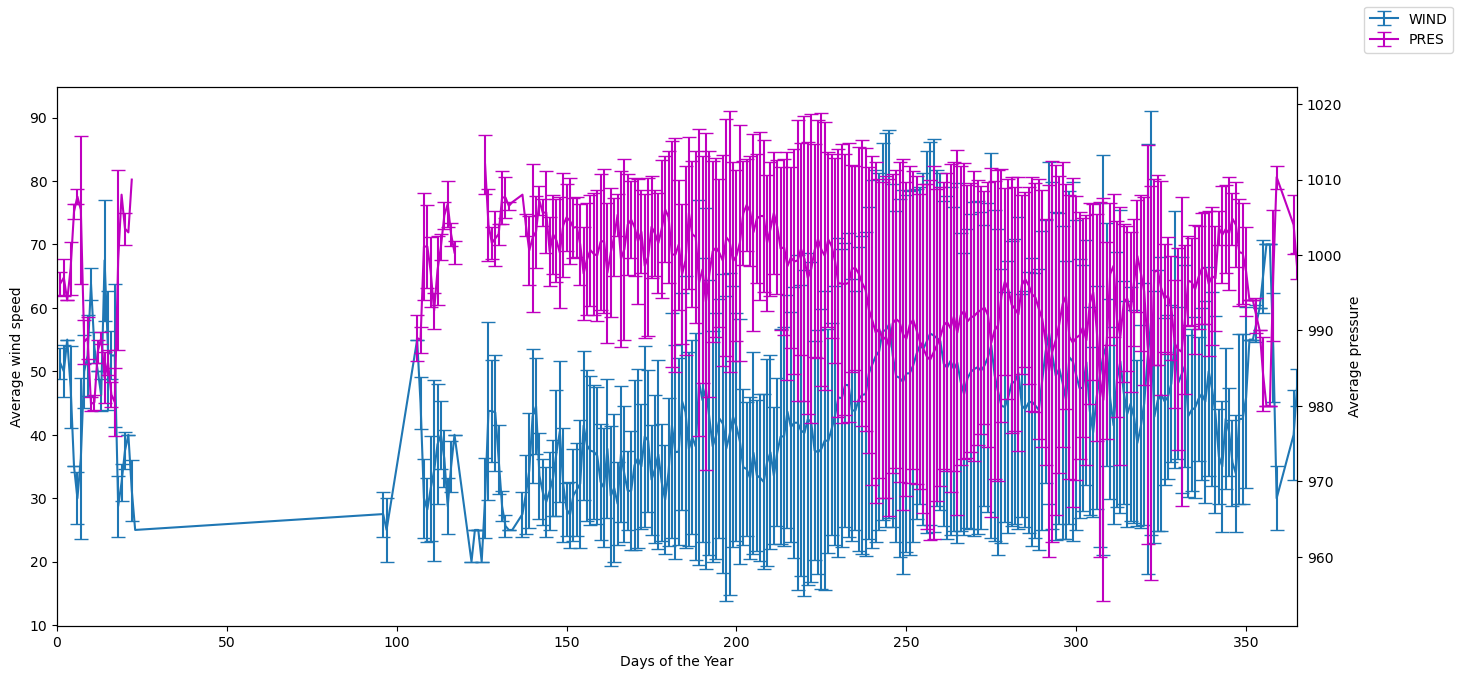

In [72]:
fig, axes = plt.subplots(figsize = (16, 7))
ax0 = axes

dayofyear_climatology_mean['WIND'].plot.line(ax = ax0, yerr = dayofyear_climatology_std['WIND'], capsize = 5)
ax0.set_xlabel('Days of the Year')
ax0.set_ylabel('Average wind speed')
ax0.set_xlim(0,365)

ax1 = ax0.twinx()
dayofyear_climatology_mean['PRES'].plot.line(ax = ax1, color = 'm', yerr = dayofyear_climatology_std['PRES'], capsize = 5)
ax1.set_ylabel('Average pressure')
# ax1.tick_params('y', colors='r')
ax1.set_xlim(0,365)

fig.legend()

plt.show()

### 16) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

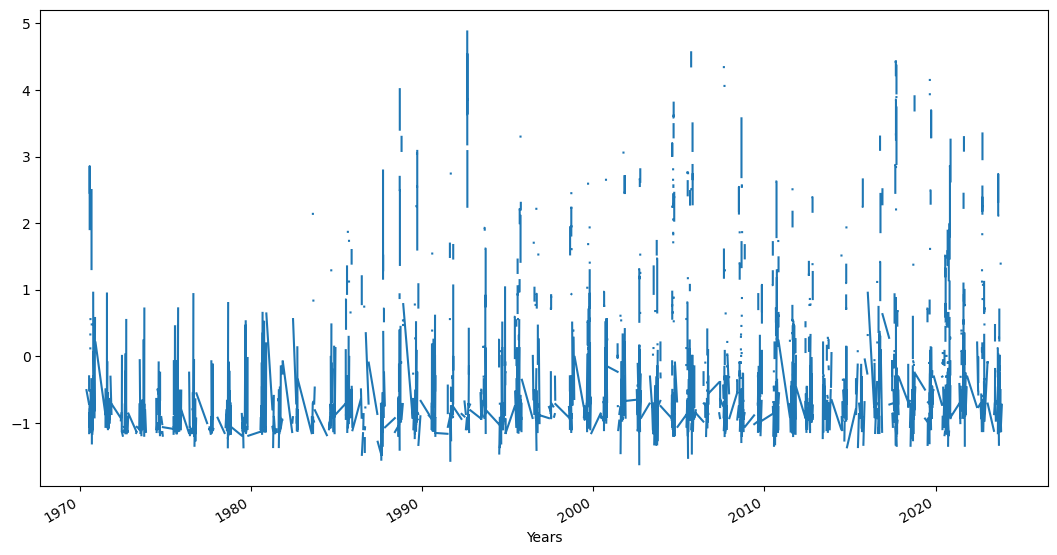

In [92]:
def standardize(x):
    return (x - x.mean())/x.std()

anomaly_wind = NA_since_1970['WIND'].groupby(NA_since_1970.index.day).transform(standardize)

fig, axes = plt.subplots(figsize = (13, 7))
ax0 = axes

anomaly_wind.plot(ax = ax0, y = 'WIND')
ax0.set_xlabel('Years');

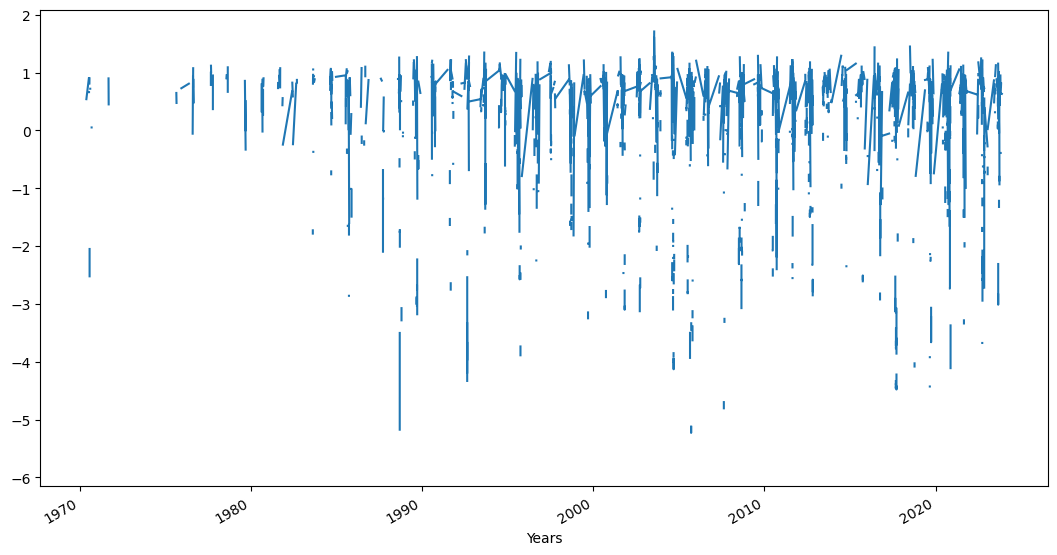

In [91]:
def standardize(x):
    return (x - x.mean())/x.std()

anomaly_pres = NA_since_1970['PRES'].groupby(NA_since_1970.index.day).transform(standardize)

fig, axes = plt.subplots(figsize = (13, 7))
ax0 = axes

anomaly_pres.plot(ax = ax0, y = 'PRES')
ax0.set_xlabel('Years');

Which years stand out as having anomalous hurricane activity?

In [95]:
anomaly_wind.nlargest(n = 10)

ISO_TIME
1992-08-23 18:00:00    4.878130
1980-08-07 18:00:00    4.746828
1992-08-23 12:00:00    4.646210
1988-09-14 00:00:00    4.620170
2005-09-22 03:00:00    4.565600
2005-09-22 06:00:00    4.565600
1998-10-26 18:00:00    4.543962
1992-08-24 08:40:00    4.532959
1992-08-24 09:05:00    4.532959
1980-08-05 12:00:00    4.518143
Name: WIND, dtype: float64

In [97]:
anomaly_pres.nsmallest(n = 10)

ISO_TIME
2005-10-19 12:00:00   -5.770713
1988-09-14 00:00:00   -5.376688
1988-09-14 06:00:00   -5.326014
2005-10-20 00:00:00   -5.306474
2005-10-19 06:00:00   -5.253748
2005-10-19 18:00:00   -5.253748
2005-09-22 03:00:00   -5.229419
1980-08-07 18:00:00   -5.225535
1988-09-14 12:00:00   -5.173992
2005-09-22 00:00:00   -5.124230
Name: PRES, dtype: float64

In [ ]:
# According to the greatest magnitude anomalies for both wind and pressure, 1988, 1980, and 2005 stand out as having anomalous activities (these years are on both
# lists above...).